In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

from net import Net
from gates import *
from optim import ADAM
from util import plot_images

(1288, 62, 47) (1288,)


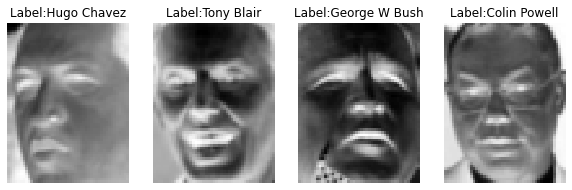

In [2]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70)
plot_images(lfw_people.images, lfw_people.target_names[lfw_people.target],4)

(1288, 47, 47) (1288,)
(1288, 1, 47, 47) (1288,)


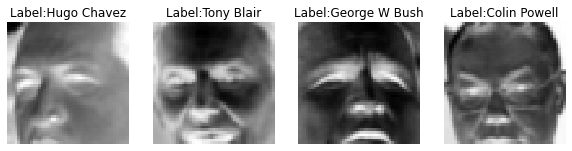

In [3]:
X,y=lfw_people.images,lfw_people.target
# Square image.
X=X[:,0:47,:]
plot_images(X, lfw_people.target_names[lfw_people.target],4)

# reshape
X=np.expand_dims(X, axis=1)
print(X.shape, y.shape)

num_labels=len(np.unique(y))

In [4]:
class Dropout(Gate):
    
    def __init__(self,p=.5):
        super().__init__()
        self.p=p # probability        
        self.cache=dict()
        
    def __str__(self):
        return f'Dropout prob.:{self.prob}'
    
    def predict(self,X):
        return X*self.p
    
    def forward(self, X):
        """
        X
        ----------
        X : shape=(N,D) or         X : shape=(N, K, D)

        Returns
        -------
        Z : shape=(N,D) or         X : shape=(N, K, D)

        """
        # dropout mask containing True or False.
        M=  np.random.rand(*X.shape) < self.p
        self.cache['M']=M 
        # Set 0 where False is. and perform elementwise product.
        X*=M 
        return X
    def backward(self, dZ):
        # set gradients to 0.
        dZ*=self.cache['M'] 
        return dZ

In [5]:
class InvertedDropout(Gate):
    
    def __init__(self,p=.5):
        super().__init__()
        self.p=p # probability        
        self.cache=dict()
        
    def __str__(self):
        return f'Dropout prob.:{self.prob}'
    
    def predict(self,X):
        return X # do nothing.
    
    def forward(self, X):
        """
        X
        ----------
        X : shape=(N,D) or         X : shape=(N, K, D)

        Returns
        -------
        Z : shape=(N,D) or         X : shape=(N, K, D)

        """
        # dropout mask containing True or False.
        M=  (np.random.rand(*X.shape) < self.p) / self.p
        self.cache['M']=M 
        # Set 0 where False is. and perform elementwise product.
        X*=M 
        return X
    def backward(self, dZ):
        # set gradients to 0.
        dZ*=self.cache['M'] 
        return dZ

In [6]:
net=Net(optimizer=ADAM())
net.add_from_iter([Reshape(flatten=True),
                   Linear(in_features=47**2,out_features=47),
                   BatchNorm(47),
                   ReLU(),
                   Dropout(p=.5),
                   Linear(in_features=47,out_features=num_labels),
                   Softmax()])

net.train(X,y,batchsize=512,epoch=1000,shuffle_per_epoch=True,print_out_per_epoch=100)

Training starts.
[Epoch:100]-[Avg.Loss:1.195]-[Avg.Acc:0.404]
[Epoch:200]-[Avg.Loss:1.011]-[Avg.Acc:0.475]
[Epoch:300]-[Avg.Loss:0.879]-[Avg.Acc:0.526]
[Epoch:400]-[Avg.Loss:0.768]-[Avg.Acc:0.571]
[Epoch:500]-[Avg.Loss:0.676]-[Avg.Acc:0.613]
[Epoch:600]-[Avg.Loss:0.613]-[Avg.Acc:0.630]
[Epoch:700]-[Avg.Loss:0.574]-[Avg.Acc:0.658]
[Epoch:800]-[Avg.Loss:0.513]-[Avg.Acc:0.674]
[Epoch:900]-[Avg.Loss:0.434]-[Avg.Acc:0.700]
[Epoch:1000]-[Avg.Loss:0.413]-[Avg.Acc:0.714]


In [7]:
net=Net(optimizer=ADAM())
net.add_from_iter([Reshape(flatten=True),
                   Linear(in_features=47**2,out_features=47),
                   BatchNorm(47),
                   ReLU(),
                   Dropout(p=.0), # all set to 0 :) no learning
                   Linear(in_features=47,out_features=num_labels),
                   Softmax()])

net.train(X,y,batchsize=512,epoch=1000,shuffle_per_epoch=True,print_out_per_epoch=100)

Training starts.
[Epoch:100]-[Avg.Loss:1.540]-[Avg.Acc:0.051]
[Epoch:200]-[Avg.Loss:1.530]-[Avg.Acc:0.049]
[Epoch:300]-[Avg.Loss:1.520]-[Avg.Acc:0.046]
[Epoch:400]-[Avg.Loss:1.514]-[Avg.Acc:0.047]
[Epoch:500]-[Avg.Loss:1.506]-[Avg.Acc:0.046]
[Epoch:600]-[Avg.Loss:1.500]-[Avg.Acc:0.045]
[Epoch:700]-[Avg.Loss:1.496]-[Avg.Acc:0.046]
[Epoch:800]-[Avg.Loss:1.495]-[Avg.Acc:0.050]
[Epoch:900]-[Avg.Loss:1.490]-[Avg.Acc:0.142]
[Epoch:1000]-[Avg.Loss:1.488]-[Avg.Acc:0.145]
